In [1]:
from __future__ import division, print_function
import sys, os, glob, time, warnings, gc
import matplotlib.pyplot as plt
import numpy as np
from astropy.table import Table, vstack, hstack

from astropy.convolution import Gaussian2DKernel
from astropy.convolution import convolve
from scipy.ndimage.filters import gaussian_filter

In [2]:
params = {'legend.fontsize': 'large',
         'axes.labelsize': 'large',
         'axes.titlesize':'large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'large',
         'figure.facecolor':'w'} 
plt.rcParams.update(params)

(50, 100)
99


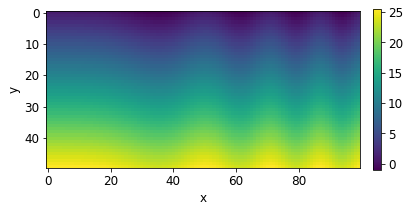

In [3]:
xx, yy = np.meshgrid(np.arange(100), np.arange(50))
print(xx.shape)
print(xx.max())

# data = xx**2/200 + yy
data = np.cos(xx**2/400) + yy/2

im = plt.imshow(data)
plt.colorbar(im, fraction=0.024, pad=0.04)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

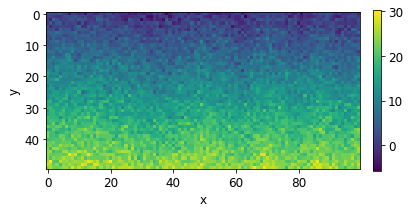

In [7]:
noise = np.random.randn(*data.shape) * 2
data_noisy = data + noise

im = plt.imshow(data_noisy)
plt.colorbar(im, fraction=0.024, pad=0.04)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

__Gaussian filter (scipy)__

smoothed image:


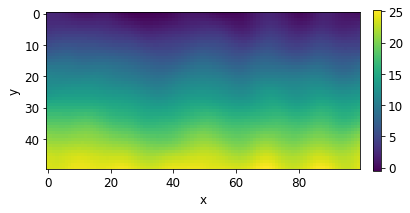

residual:


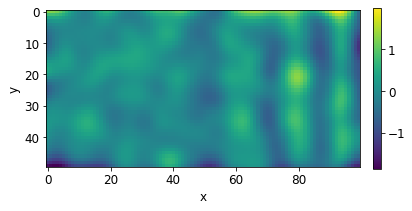

difference with noisy image:


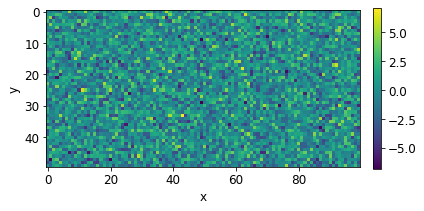

In [8]:
data1 = gaussian_filter(data_noisy, 3, mode='nearest')

print('smoothed image:')
im = plt.imshow(data1)
plt.colorbar(im, fraction=0.024, pad=0.04)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

print('residual:')
im = plt.imshow(data1 - data)
plt.colorbar(im, fraction=0.024, pad=0.04)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

print('difference with noisy image:')
im = plt.imshow(data1 - data_noisy)
plt.colorbar(im, fraction=0.024, pad=0.04)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

__Gaussian filter (astropy)__

smoothed image:


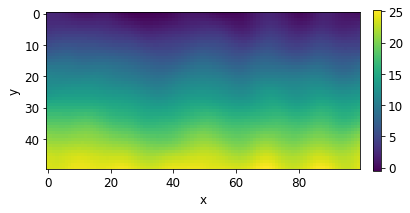

residual:


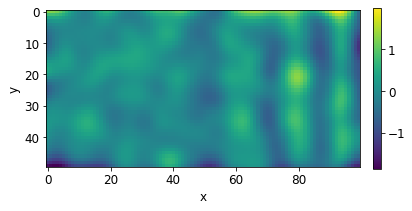

difference with noisy image:


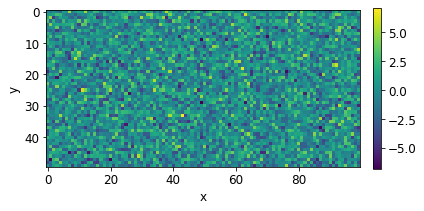

In [9]:
kernel = Gaussian2DKernel(stddev=3)
data1 = convolve(data_noisy, kernel, boundary='extend', nan_treatment='interpolate')

print('smoothed image:')
im = plt.imshow(data1)
plt.colorbar(im, fraction=0.024, pad=0.04)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

print('residual:')
im = plt.imshow(data1 - data)
plt.colorbar(im, fraction=0.024, pad=0.04)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

print('difference with noisy image:')
im = plt.imshow(data1 - data_noisy)
plt.colorbar(im, fraction=0.024, pad=0.04)
plt.xlabel('x')
plt.ylabel('y')
plt.show()